In [1]:
# 5.2 function composition
import numpy as np

def add3(input_array):
    return map(lambda x: x+3, input_array)

def mul2(input_array):
    return map(lambda x: x*2, input_array)

def sub5(input_array):
    return map(lambda x: x-5, input_array)

def reduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        try:
            initializer = next(it)
        except StopIteration:
            raise TypeError('reduce() of empty sequence with no initial value')
    accum_value = initializer
    for x in it:
        accum_value = function(accum_value, x)
    return accum_value


def function_composer(*args):
    return reduce(lambda f, g: lambda x: f(g(x)), args)

if __name__=='__main__':
    arr = np.array([2,5,4,7])
    print("\nOperation: add3(mul2(sub5(arr)))")
    
    arr1 = add3(arr)
    arr2 = mul2(arr1)
    arr3 = sub5(arr2)
    print("Output using the lengthy way:", arr3)

    func_composed = function_composer(sub5, mul2, add3)
    print("Output using function composition:", func_composed(arr))

    print("\nOperation: sub5(add3(mul2(sub5(mul2(arr)))))\nOutput:", \
            function_composer(mul2, sub5, mul2, add3, sub5)(arr))


Operation: add3(mul2(sub5(arr)))
Output using the lengthy way: <map object at 0x10a723f60>
Output using function composition: <map object at 0x10b655198>

Operation: sub5(add3(mul2(sub5(mul2(arr)))))
Output: <map object at 0x10b7bf7f0>


In [2]:
# 5.3 pipline
from sklearn.datasets import samples_generator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# generate sample data
X, y = samples_generator.make_classification(
        n_informative=4, n_features=20, n_redundant=0, random_state=5)

# Feature selector 
selector_k_best = SelectKBest(f_regression, k=10)

# Random forest classifier
classifier = RandomForestClassifier(n_estimators=50, max_depth=4)

# Build the machine learning pipeline
pipeline_classifier = Pipeline([('selector', selector_k_best), ('rf', classifier)])

# We can set the parameters using the names we assigned
# earlier. For example, if we want to set 'k' to 6 in the
# feature selector and set 'n_estimators' in the Random 
# Forest Classifier to 25, we can do it as shown below
pipeline_classifier.set_params(selector__k=6, 
        rf__n_estimators=25)

# Training the classifier
pipeline_classifier.fit(X, y)

# Predict the output
prediction = pipeline_classifier.predict(X)
print("\nPredictions:\n", prediction)

# Print score
print("\nScore:", pipeline_classifier.score(X, y))                        

# Print the selected features chosen by the selector
features_status = pipeline_classifier.named_steps['selector'].get_support()
selected_features = []
for count, item in enumerate(features_status):
    if item:
        selected_features.append(count)

print("\nSelected features (0-indexed):", ', '.join([str(x) for x in selected_features]))



Predictions:
 [1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1]

Score: 0.96

Selected features (0-indexed): 0, 5, 9, 10, 11, 15



k nearest neighbors
1 --> [1. 1.]
2 --> [2. 2.]
3 --> [1. 3.]


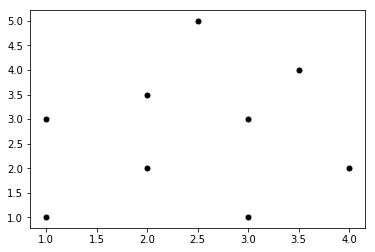

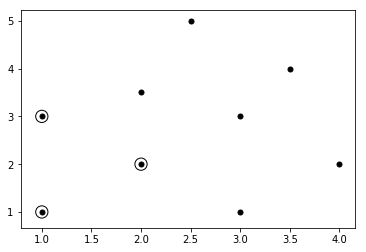

In [4]:
# 5.4 knn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Input data
X = np.array([[1, 1], [1, 3], [2, 2], [2.5, 5], [3, 1], 
        [4, 2], [2, 3.5], [3, 3], [3.5, 4]])

# Number of neighbors we want to find
num_neighbors = 3

# Input point
input_point = [2.6, 1.7]

# Plot datapoints
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k')

# Build nearest neighbors model
knn = NearestNeighbors(n_neighbors=num_neighbors, algorithm='ball_tree').fit(X)
distances, indices = knn.kneighbors(X)

# Print the 'k' nearest neighbors
print("\nk nearest neighbors")
for rank, index in enumerate(indices[0][:num_neighbors]):
    print(str(rank+1) + " -->", X[index]) 

# Plot the nearest neighbors 
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k')
plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], 
        marker='o', s=150, color='k', facecolors='none')
plt.scatter(input_point[0], input_point[1],
        marker='x', s=150, color='k', facecolors='none')

plt.show()

Predicted output: 2


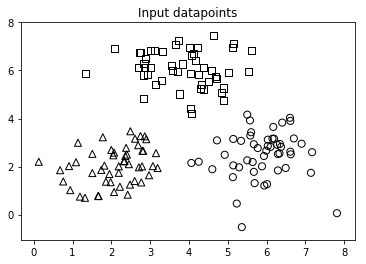

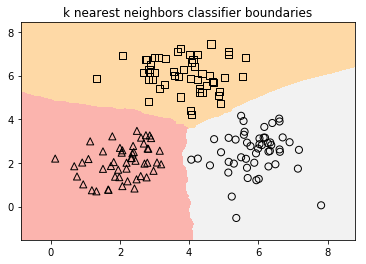

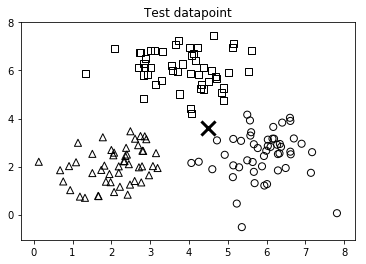

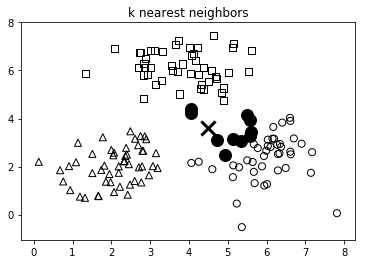

In [9]:
# 5.5 knn classifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets
from utilities import load_data

# Load input data
input_file = 'data_nn_classifier.txt'
data = load_data(input_file)
X, y = data[:,:-1], data[:,-1].astype(np.int)

# Plot input data
plt.figure()
plt.title('Input datapoints')
markers = '^sov<>hp'
mapper = np.array([markers[i] for i in y])
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

# Number of nearest neighbors to consider
num_neighbors = 10

# step size of the grid
h = 0.01  

# Create a K-Neighbours Classifier model and train it
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X, y)

# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute the outputs for all the points on the mesh
predicted_values = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

# Put the computed results on the map
predicted_values = predicted_values.reshape(x_grid.shape)
plt.figure()
plt.pcolormesh(x_grid, y_grid, predicted_values, cmap=cm.Pastel1)

# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.xlim(x_grid.min(), x_grid.max())
plt.ylim(y_grid.min(), y_grid.max())
plt.title('k nearest neighbors classifier boundaries')

# Test input datapoint
test_datapoint = [4.5, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=3, s=200, facecolors='black')

# Extract k nearest neighbors
test_datapoint = np.array(test_datapoint)
a = test_datapoint.reshape(1, -1)
dist, indices = classifier.kneighbors(a)

# Plot k nearest neighbors
plt.figure()
plt.title('k nearest neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker='o', 
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=3, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict(a)[0])

plt.show()

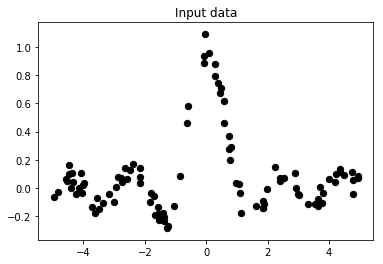

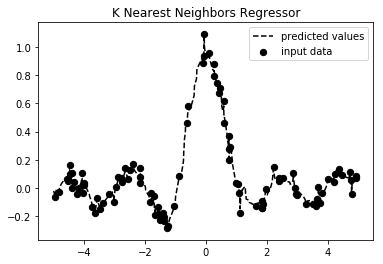

In [10]:
# 5.6 knn regressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# Generate sample data
amplitude = 10
num_points = 100
X = amplitude * np.random.rand(num_points, 1) - 0.5 * amplitude

# Compute target and add noise
y = np.sinc(X).ravel() 
y += 0.2 * (0.5 - np.random.rand(y.size))

# Plot input data
plt.figure()
plt.scatter(X, y, s=40, c='k', facecolors='none')
plt.title('Input data')

# Create the 1D grid with 10 times the density of the input data
x_values = np.linspace(-0.5*amplitude, 0.5*amplitude, 10*num_points)[:, np.newaxis]

# Number of neighbors to consider 
n_neighbors = 8

# Define and train the regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_values = knn_regressor.fit(X, y).predict(x_values)

plt.figure()
plt.scatter(X, y, s=40, c='k', facecolors='none', label='input data')
plt.plot(x_values, y_values, c='k', linestyle='--', label='predicted values')
plt.xlim(X.min() - 1, X.max() + 1)
plt.ylim(y.min() - 0.2, y.max() + 0.2)
plt.axis('tight')
plt.legend()
plt.title('K Nearest Neighbors Regressor')

plt.show()

In [11]:
# 5.7 Euclidean distance score
import json
import numpy as np
 
# Returns the Euclidean distance score between user1 and user2 
def euclidean_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('User ' + user1 + ' not present in the dataset')

    if user2 not in dataset:
        raise TypeError('User ' + user2 + ' not present in the dataset')

    # Movies rated by both user1 and user2
    rated_by_both = {} 

    for item in dataset[user1]:
        if item in dataset[user2]:
            rated_by_both[item] = 1

    # If there are no common movies, the score is 0 
    if len(rated_by_both) == 0:
        return 0

    squared_differences = [] 

    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_differences.append(np.square(dataset[user1][item] - dataset[user2][item]))
        
    return 1 / (1 + np.sqrt(np.sum(squared_differences))) 

if __name__=='__main__':
    data_file = 'movie_ratings.json'

    with open(data_file, 'r') as f:
        data = json.loads(f.read())

    user1 = 'John Carson'
    user2 = 'Michelle Peterson'

    print("\nEuclidean score:")
    print(euclidean_score(data, user1, user2))


Euclidean score:
0.29429805508554946


In [12]:
# 5.8 Pearson correlation Score
import json
import numpy as np

# Returns the Pearson correlation score between user1 and user2 
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('User ' + user1 + ' not present in the dataset')

    if user2 not in dataset:
        raise TypeError('User ' + user2 + ' not present in the dataset')

    # Movies rated by both user1 and user2
    rated_by_both = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            rated_by_both[item] = 1

    num_ratings = len(rated_by_both) 

    # If there are no common movies, the score is 0 
    if num_ratings == 0:
        return 0

    # Compute the sum of ratings of all the common preferences 
    user1_sum = np.sum([dataset[user1][item] for item in rated_by_both])
    user2_sum = np.sum([dataset[user2][item] for item in rated_by_both])

    # Compute the sum of squared ratings of all the common preferences 
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in rated_by_both])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in rated_by_both])

    # Compute the sum of products of the common ratings 
    product_sum = np.sum([dataset[user1][item] * dataset[user2][item] for item in rated_by_both])

    # Compute the Pearson correlation
    Sxy = product_sum - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings
    
    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)

if __name__=='__main__':
    data_file = 'movie_ratings.json'

    with open(data_file, 'r') as f:
        data = json.loads(f.read())

    user1 = 'John Carson'
    user2 = 'Michelle Peterson'

    print("\nPearson score:")
    print(pearson_score(data, user1, user2))


Pearson score:
0.39605901719066977


In [13]:
# 5.9 find similar users
import json
import numpy as np
from pearson_score import pearson_score

# Finds a specified number of users who are similar to the input user
def find_similar_users(dataset, user, num_users):
    if user not in dataset:
        raise TypeError('User ' + user + ' not present in the dataset')

    # Compute Pearson scores for all the users
    scores = np.array([[x, pearson_score(dataset, user, x)] for x in dataset if user != x])

    # Sort the scores based on second column
    scores_sorted = np.argsort(scores[:, 1])

    # Sort the scores in decreasing order (highest score first) 
    scored_sorted_dec = scores_sorted[::-1]

    # Extract top 'k' indices
    top_k = scored_sorted_dec[0:num_users] 

    return scores[top_k] 

if __name__=='__main__':
    data_file = 'movie_ratings.json'

    with open(data_file, 'r') as f:
        data = json.loads(f.read())

    user = 'John Carson'
    print("\nUsers similar to " + user + ":\n")
    similar_users = find_similar_users(data, user, 3) 
    print("User\t\t\tSimilarity score\n")
    for item in similar_users:
        print(item[0], '\t\t', round(float(item[1]), 2))


Users similar to John Carson:

User			Similarity score

Michael Henry 		 0.99
Alex Roberts 		 0.75
Melissa Jones 		 0.59


In [14]:
# 5.10 movie recommendations
import json
import numpy as np

from euclidean_score import euclidean_score
from pearson_score import pearson_score
from find_similar_users import find_similar_users
 
# Generate recommendations for a given user
def generate_recommendations(dataset, user):
    if user not in dataset:
        raise TypeError('User ' + user + ' not present in the dataset')

    total_scores = {}
    similarity_sums = {}

    for u in [x for x in dataset if x != user]:
        similarity_score = pearson_score(dataset, user, u)

        if similarity_score <= 0:
            continue

        for item in [x for x in dataset[u] if x not in dataset[user] or dataset[user][x] == 0]:
            total_scores.update({item: dataset[u][item] * similarity_score})
            similarity_sums.update({item: similarity_score})

    if len(total_scores) == 0:
        return ['No recommendations possible']

    # Create the normalized list
    movie_ranks = np.array([[total/similarity_sums[item], item] 
            for item, total in total_scores.items()])

    # Sort in decreasing order based on the first column
    movie_ranks = movie_ranks[np.argsort(movie_ranks[:, 0])[::-1]]

    # Extract the recommended movies
    recommendations = [movie for _, movie in movie_ranks]

    return recommendations
 
if __name__=='__main__':
    data_file = 'movie_ratings.json'

    with open(data_file, 'r') as f:
        data = json.loads(f.read())

    user = 'Michael Henry'
    print("\nRecommendations for " + user + ":")
    movies = generate_recommendations(data, user) 
    for i, movie in enumerate(movies):
        print(str(i+1) + '. ' + movie)

    user = 'John Carson' 
    print("\nRecommendations for " + user + ":")
    movies = generate_recommendations(data, user) 
    for i, movie in enumerate(movies):
        print(str(i+1) + '. ' + movie)


Recommendations for Michael Henry:
1. Jerry Maguire
2. Inception
3. Anger Management

Recommendations for John Carson:
1. No recommendations possible
